# PROBLEM 1

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [195]:
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Election_Data.csv")

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


# 1.EDA

In [4]:
df.shape

(1525, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [7]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [9]:
for feature in df.columns: 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].nunique()))



feature: Unnamed: 0
[1, 2, 3, 4, 5, ..., 1521, 1522, 1523, 1524, 1525]
Length: 1525
Categories (1525, int64): [1, 2, 3, 4, ..., 1522, 1523, 1524, 1525]
[1525]
Categories (1, int64): [1525]


feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[2]
Categories (1, int64): [2]


feature: age
[43, 36, 35, 24, 41, ..., 86, 85, 87, 93, 91]
Length: 70
Categories (70, int64): [24, 25, 26, 27, ..., 90, 91, 92, 93]
[70]
Categories (1, int64): [70]


feature: economic.cond.national
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: economic.cond.household
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Blair
[4, 5, 2, 1, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Hague
[1, 4, 2, 5, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Europe
[2, 5, 3, 4, 6, ..., 1, 7, 9, 10, 8]
Length: 11
Categories (

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [11]:
df['vote'].value_counts(normalize=True)
#since target class is not heavily skewed we don't need to perform SMOTING ANALYSIS

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

# 2. Encoding

In [12]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [13]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [14]:
df.rename(columns = {"economic.cond.national": "national_economic_cond",
                     "economic.cond.household": "household_economic_condition",
                     "political.knowledge":"politic_knowledge"},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                            1525 non-null int8
age                             1525 non-null int64
national_economic_cond          1525 non-null int64
household_economic_condition    1525 non-null int64
Blair                           1525 non-null int64
Hague                           1525 non-null int64
Europe                          1525 non-null int64
politic_knowledge               1525 non-null int64
gender                          1525 non-null int8
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


# 3. Univariate Analysis

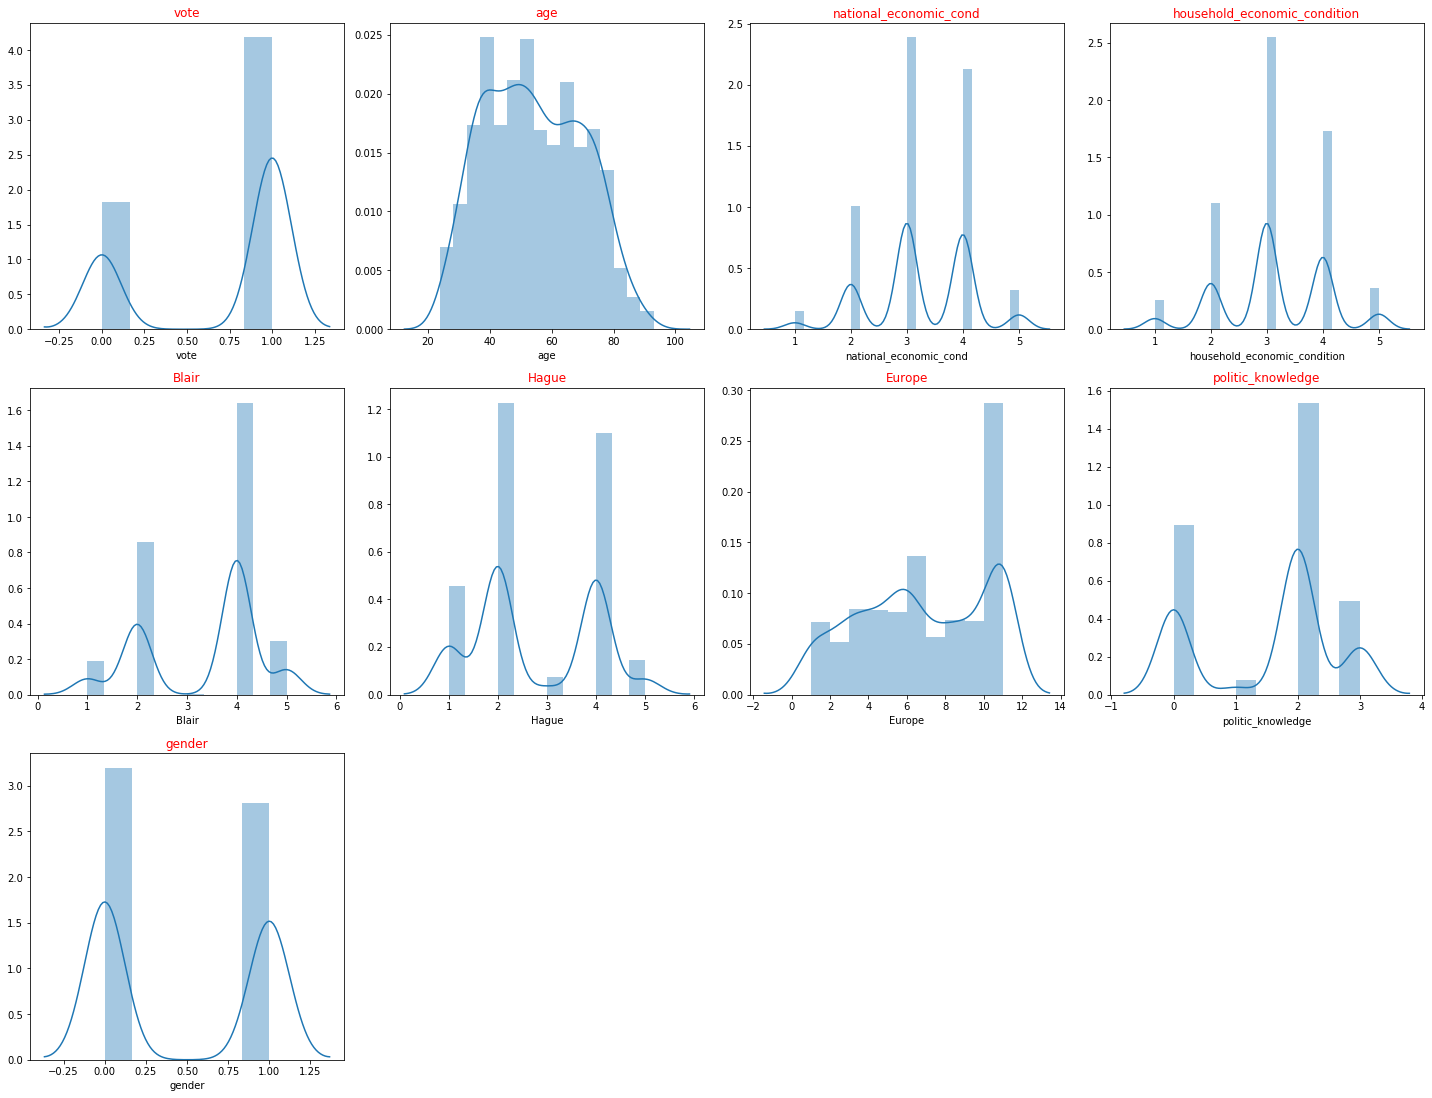

In [16]:
dist_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(dist_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(dist_plot[dist_plot.columns[i]],hist=True)
    ax.set_title(dist_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('displots for all the variables')
plt.show()

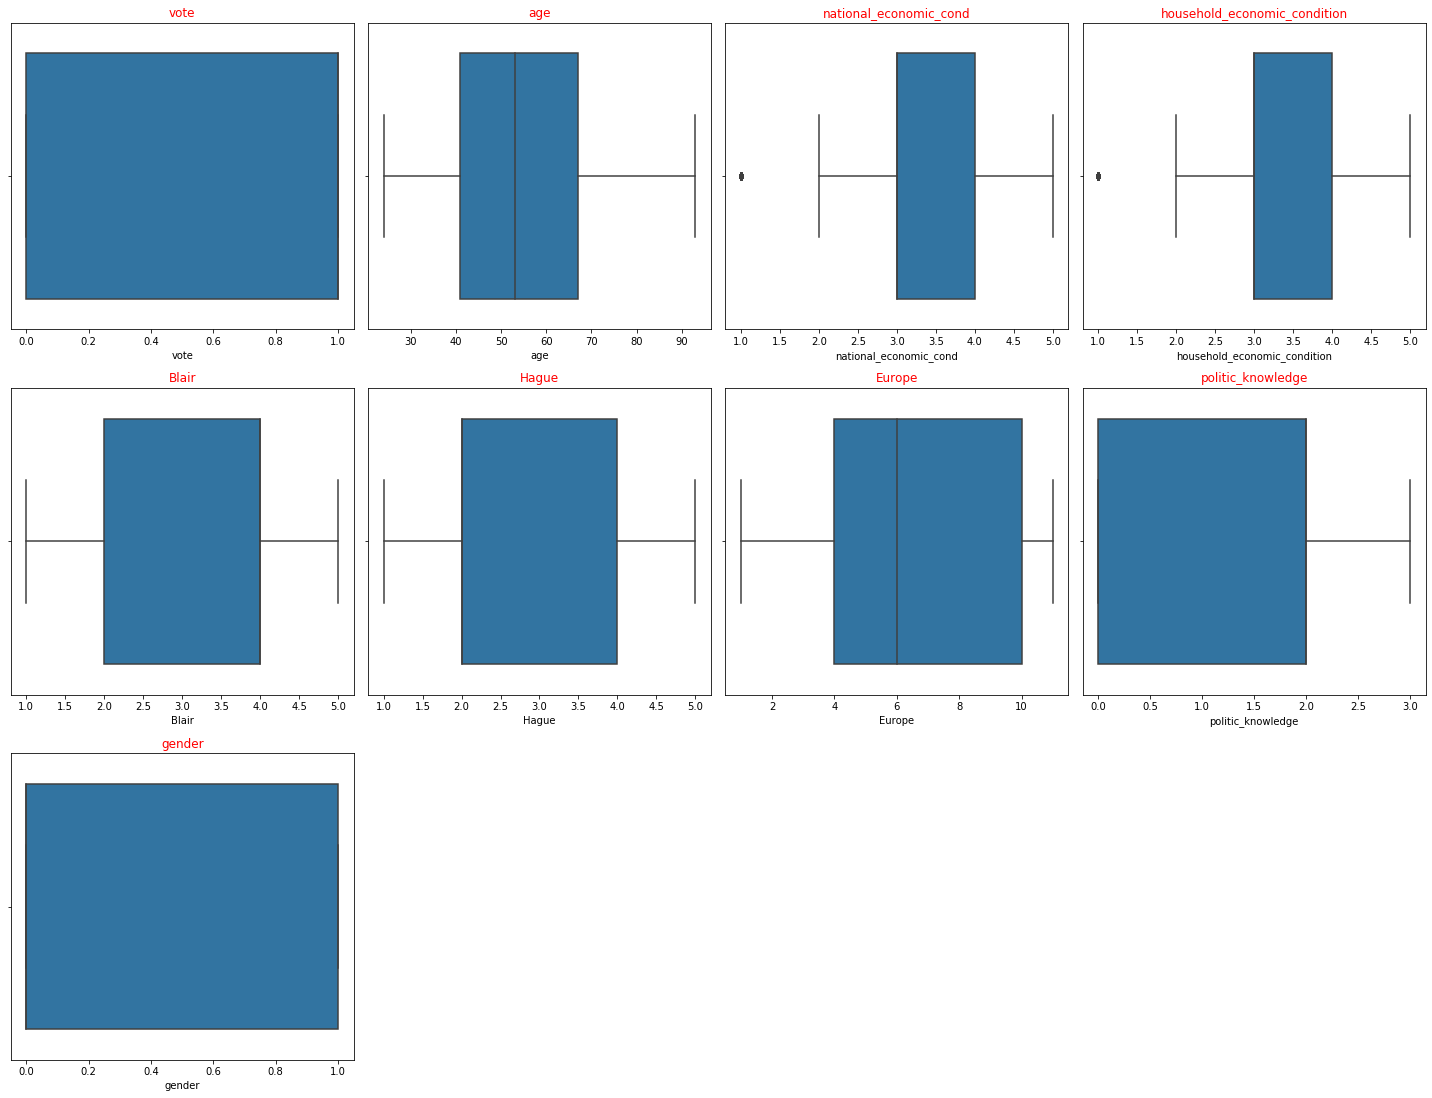

In [17]:
box_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(box_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(box_plot[box_plot.columns[i]])
    ax.set_title(box_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('outliers.png')
plt.show()

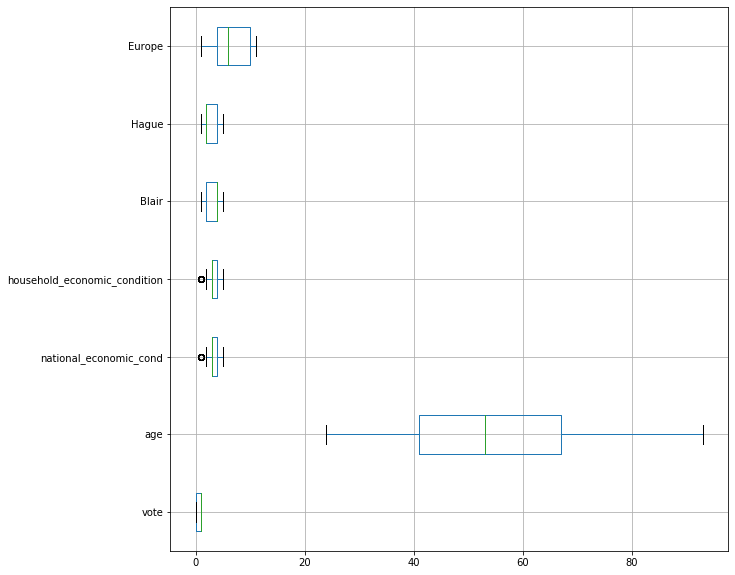

In [18]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.savefig('boxplot.png')
plt.show()

# 4. Bivariate Analysis

Text(0.5, 1.0, 'swarmplot of vote vs age')

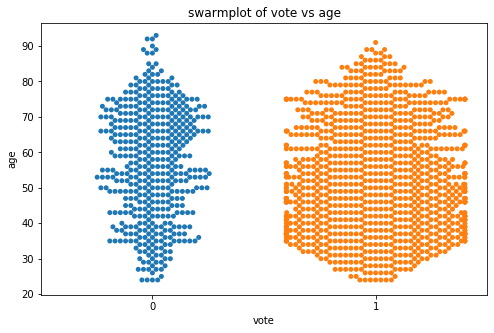

In [19]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['age']) 
plt.title('swarmplot of vote vs age')

<Figure size 576x360 with 0 Axes>

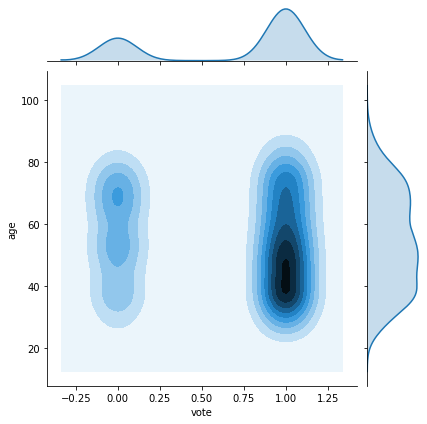

In [20]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['age'], kind="kde");

Text(0.5, 1.0, 'swarmplot of vote vs nationale_economic_cond')

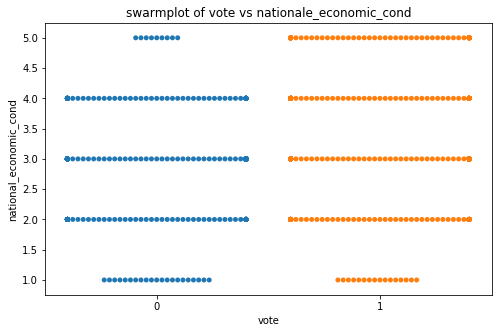

In [21]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['national_economic_cond']) 
plt.title('swarmplot of vote vs nationale_economic_cond')

<Figure size 576x360 with 0 Axes>

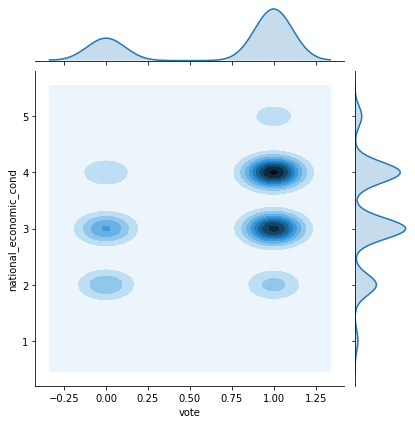

In [22]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['national_economic_cond'], kind="kde")

Text(0.5, 1.0, 'swarmplot of vote vs household_economic_cond')

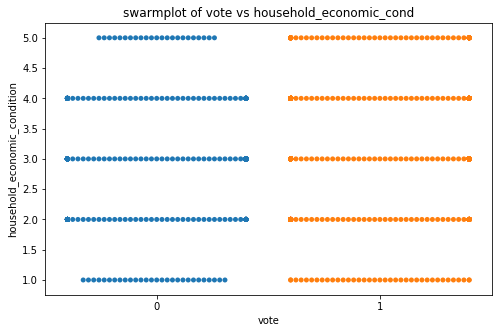

In [23]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['household_economic_condition']) 
plt.title('swarmplot of vote vs household_economic_cond')

<Figure size 576x360 with 0 Axes>

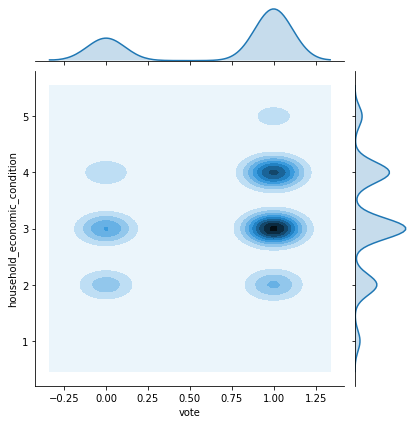

In [25]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['household_economic_condition'], kind="kde")

Text(0.5, 1.0, 'swarmplot of vote vs Blair')

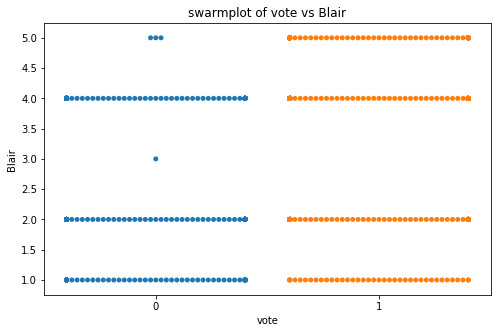

In [26]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['Blair']) 
plt.title('swarmplot of vote vs Blair')

<Figure size 576x360 with 0 Axes>

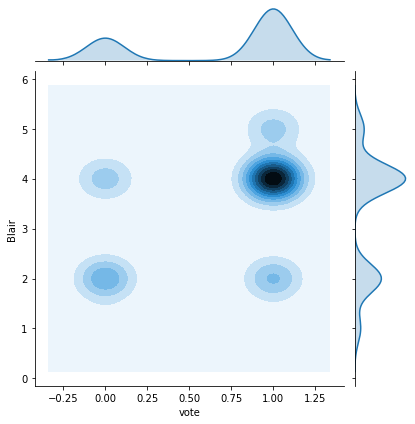

In [27]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['Blair'], kind="kde")

Text(0.5, 1.0, 'swarmplot of vote vs Hague')

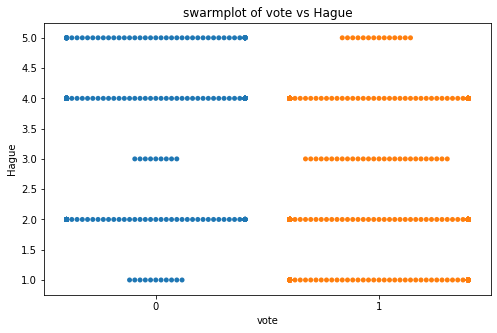

In [28]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['Hague']) 
plt.title('swarmplot of vote vs Hague')

<Figure size 576x360 with 0 Axes>

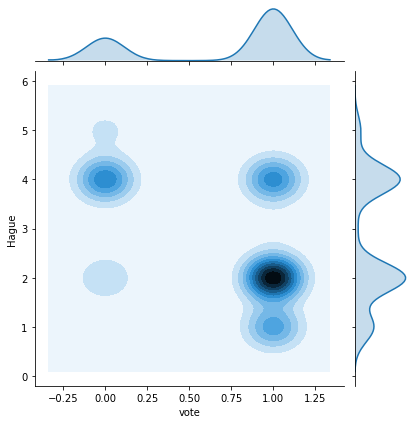

In [29]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['Hague'], kind="kde")

Text(0.5, 1.0, 'swarmplot of vote vs Europe')

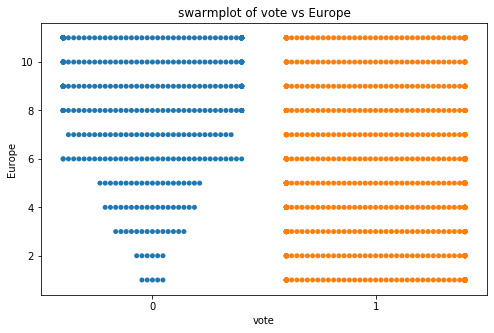

In [30]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['Europe']) 
plt.title('swarmplot of vote vs Europe')

<Figure size 576x360 with 0 Axes>

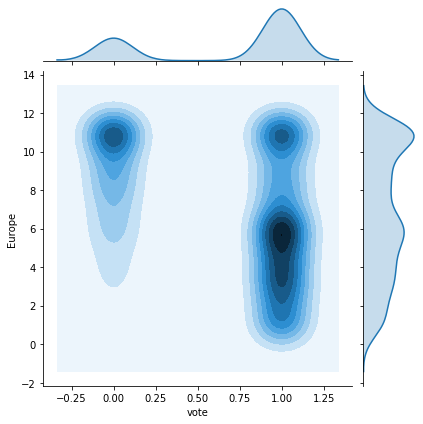

In [31]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['Europe'], kind="kde")

Text(0.5, 1.0, 'swarmplot of vote vs political_knowledge')

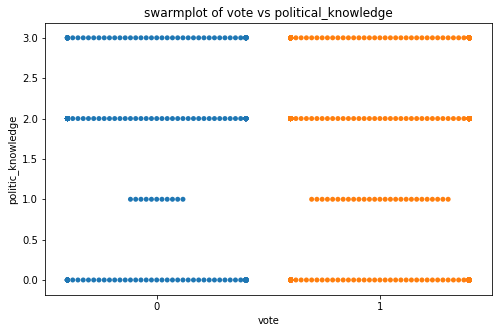

In [32]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['politic_knowledge'])
plt.title('swarmplot of vote vs political_knowledge')

<Figure size 576x360 with 0 Axes>

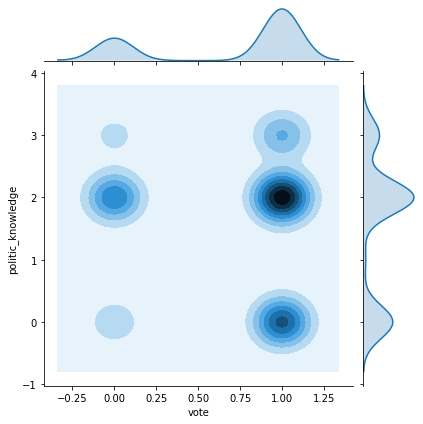

In [33]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['politic_knowledge'], kind="kde")

Text(0.5, 1.0, 'swarmplot of vote vs gender')

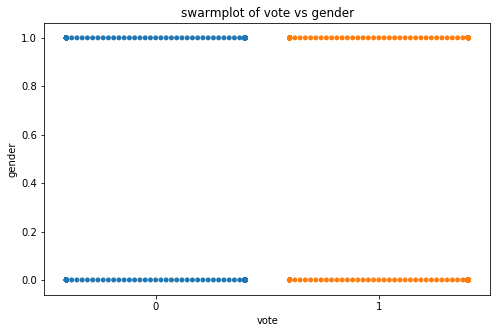

In [219]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['gender'])
plt.title('swarmplot of vote vs gender')

<Figure size 576x360 with 0 Axes>

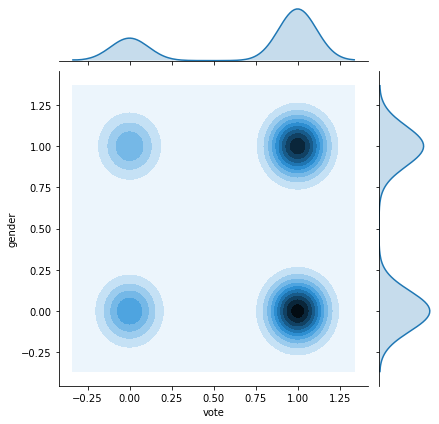

In [220]:
plt.figure(figsize=(8,5))
sns.jointplot(df['vote'], df['gender'], kind="kde")

In [34]:
df.corr()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
vote,1.000000,-0.112821,0.300737,0.174726,0.427084,-0.468508,-0.385443,-0.108653,0.037191
age,-0.112821,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490,-0.019746
national_economic_cond,0.300737,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624,0.054726
household_economic_condition,0.174726,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810,0.033853
Blair,0.427084,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917,0.070001
Hague,-0.468508,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354,-0.029408
Europe,-0.385443,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364,-0.077520
politic_knowledge,-0.108653,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000,0.158181
gender,0.037191,-0.019746,0.054726,0.033853,0.070001,-0.029408,-0.077520,0.158181,1.000000


In [35]:
df.cov()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
vote,0.211310,-0.814816,0.121789,0.074693,0.230646,-0.265052,-0.584266,-0.054107,0.008533
age,-0.814816,246.842075,0.256981,-0.607619,0.557762,0.669531,3.568550,-0.825301,-0.154840
national_economic_cond,0.121789,0.256981,0.776107,0.283712,0.338314,-0.216589,-0.608397,-0.022546,0.024063
household_economic_condition,0.074693,-0.607619,0.283712,0.864810,0.235192,-0.116689,-0.352299,-0.038091,0.015713
Blair,0.230646,0.557762,0.338314,0.235192,1.380212,-0.351648,-1.147341,-0.026621,0.041046
Hague,-0.265052,0.669531,-0.216589,-0.116689,-0.351648,1.514631,1.166149,-0.040469,-0.018064
Europe,-0.584266,3.568550,-0.608397,-0.352299,-1.147341,1.166149,10.873759,-0.544285,-0.127584
politic_knowledge,-0.054107,-0.825301,-0.022546,-0.038091,-0.026621,-0.040469,-0.544285,1.173571,0.085527
gender,0.008533,-0.154840,0.024063,0.015713,0.041046,-0.018064,-0.127584,0.085527,0.249110


In [36]:
df.skew()

vote                           -0.858449
age                             0.144621
national_economic_cond         -0.240453
household_economic_condition   -0.149552
Blair                          -0.535419
Hague                           0.152100
Europe                         -0.135947
politic_knowledge              -0.426838
gender                          0.130239
dtype: float64

# 5. Multivariate Analysis

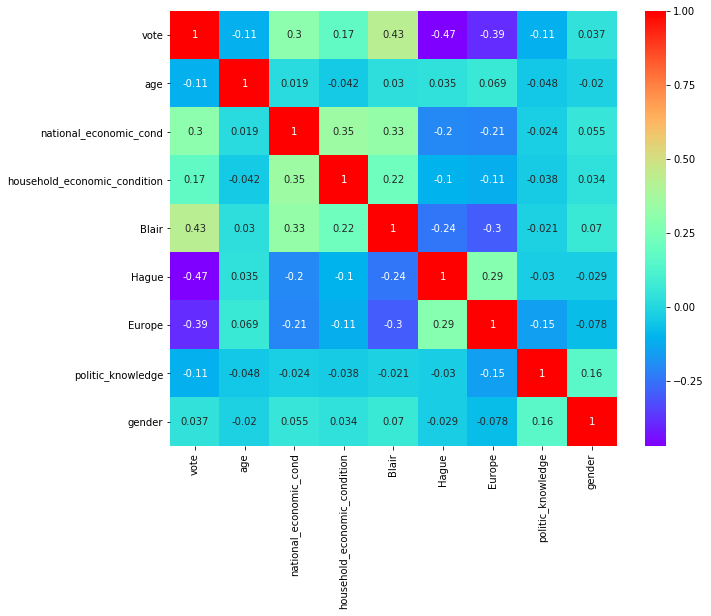

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='rainbow')
plt.savefig('heatmap.png')
plt.show()

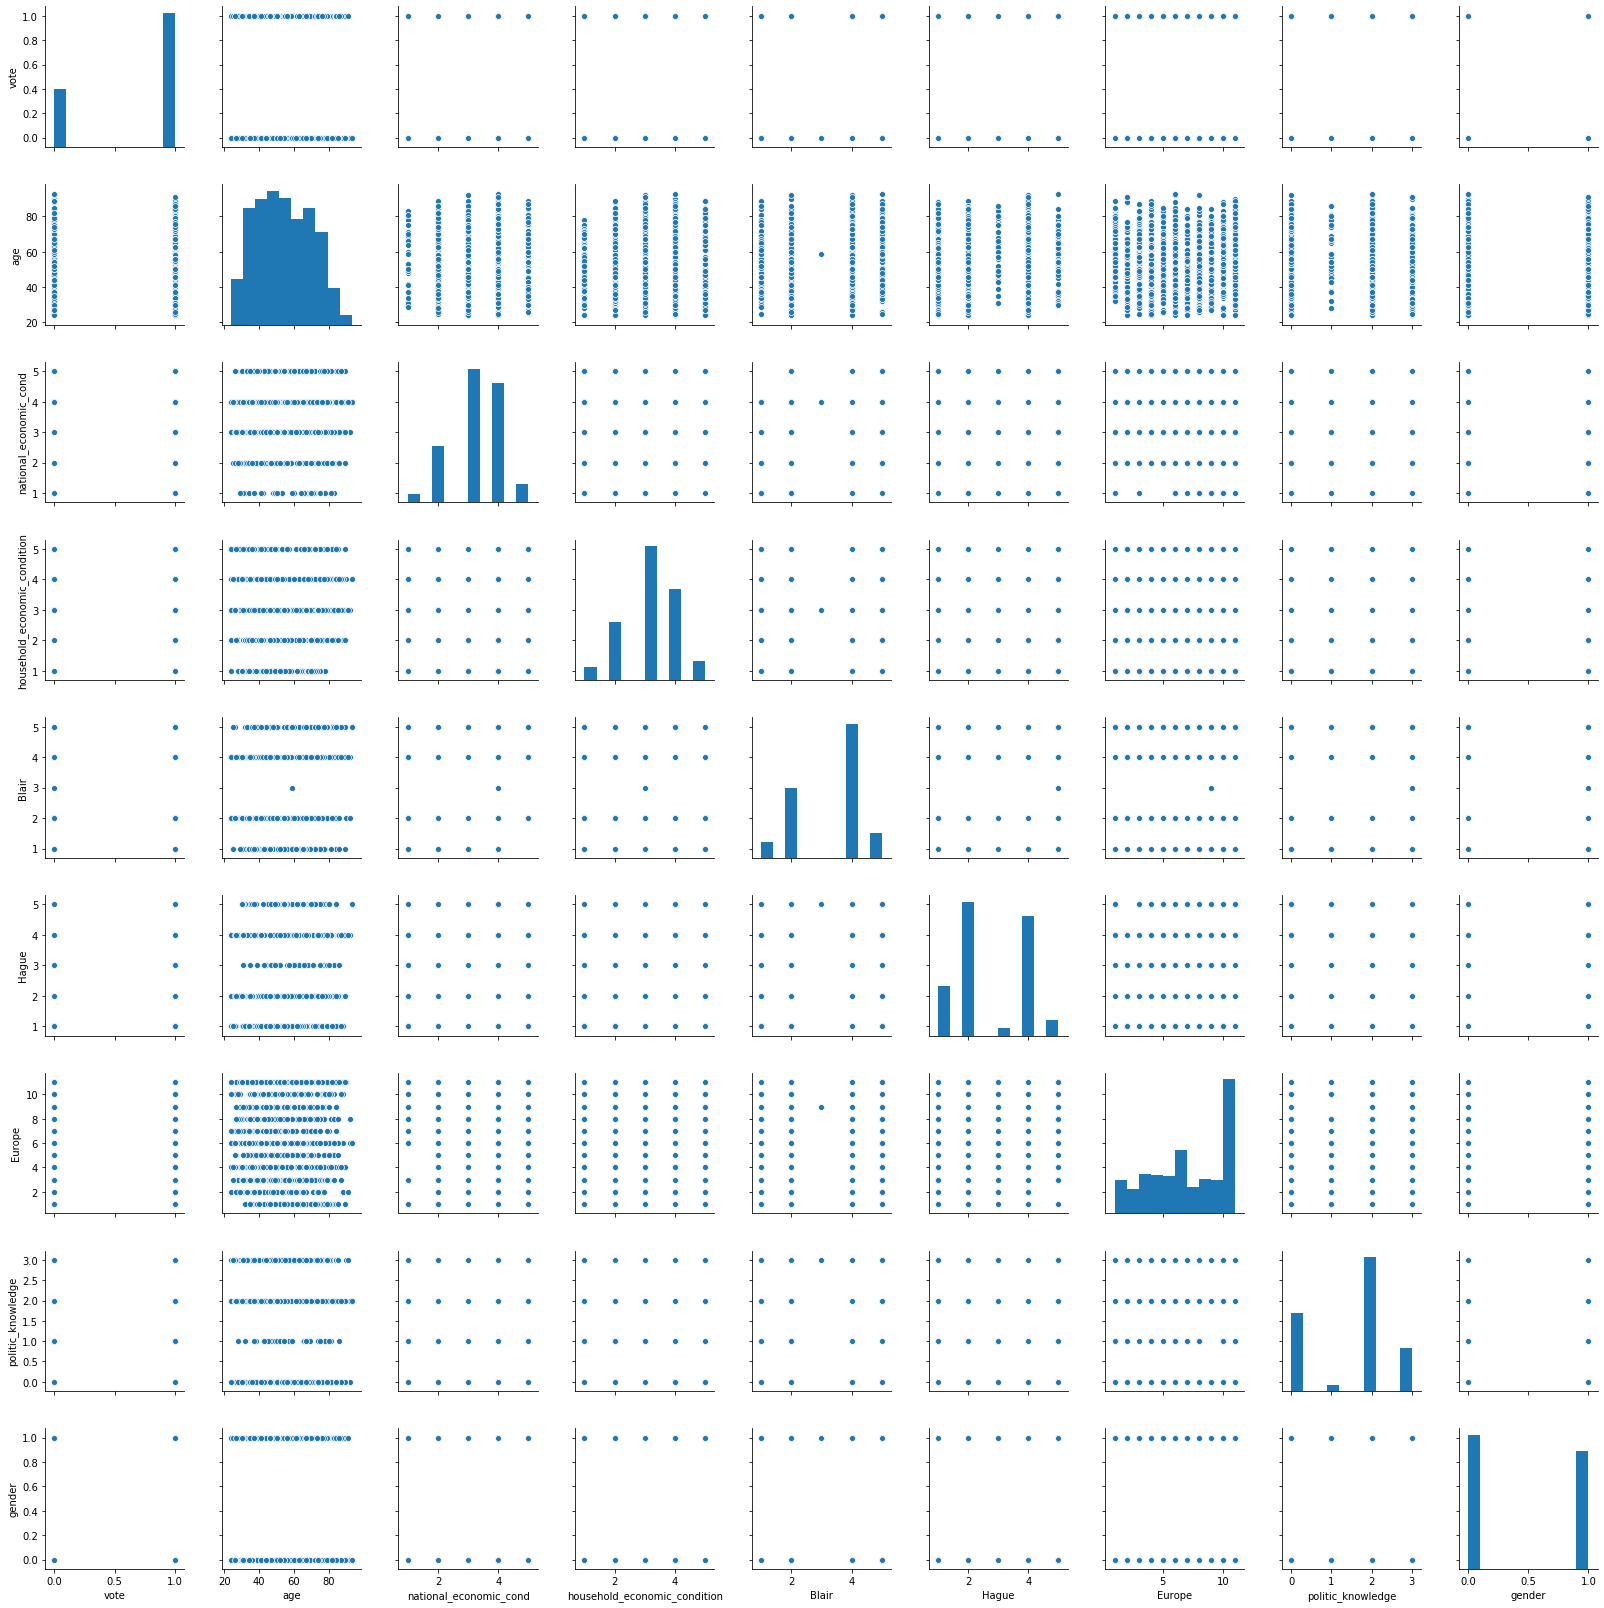

In [38]:
sns.pairplot(df)
plt.savefig('kde type pairplot.png')

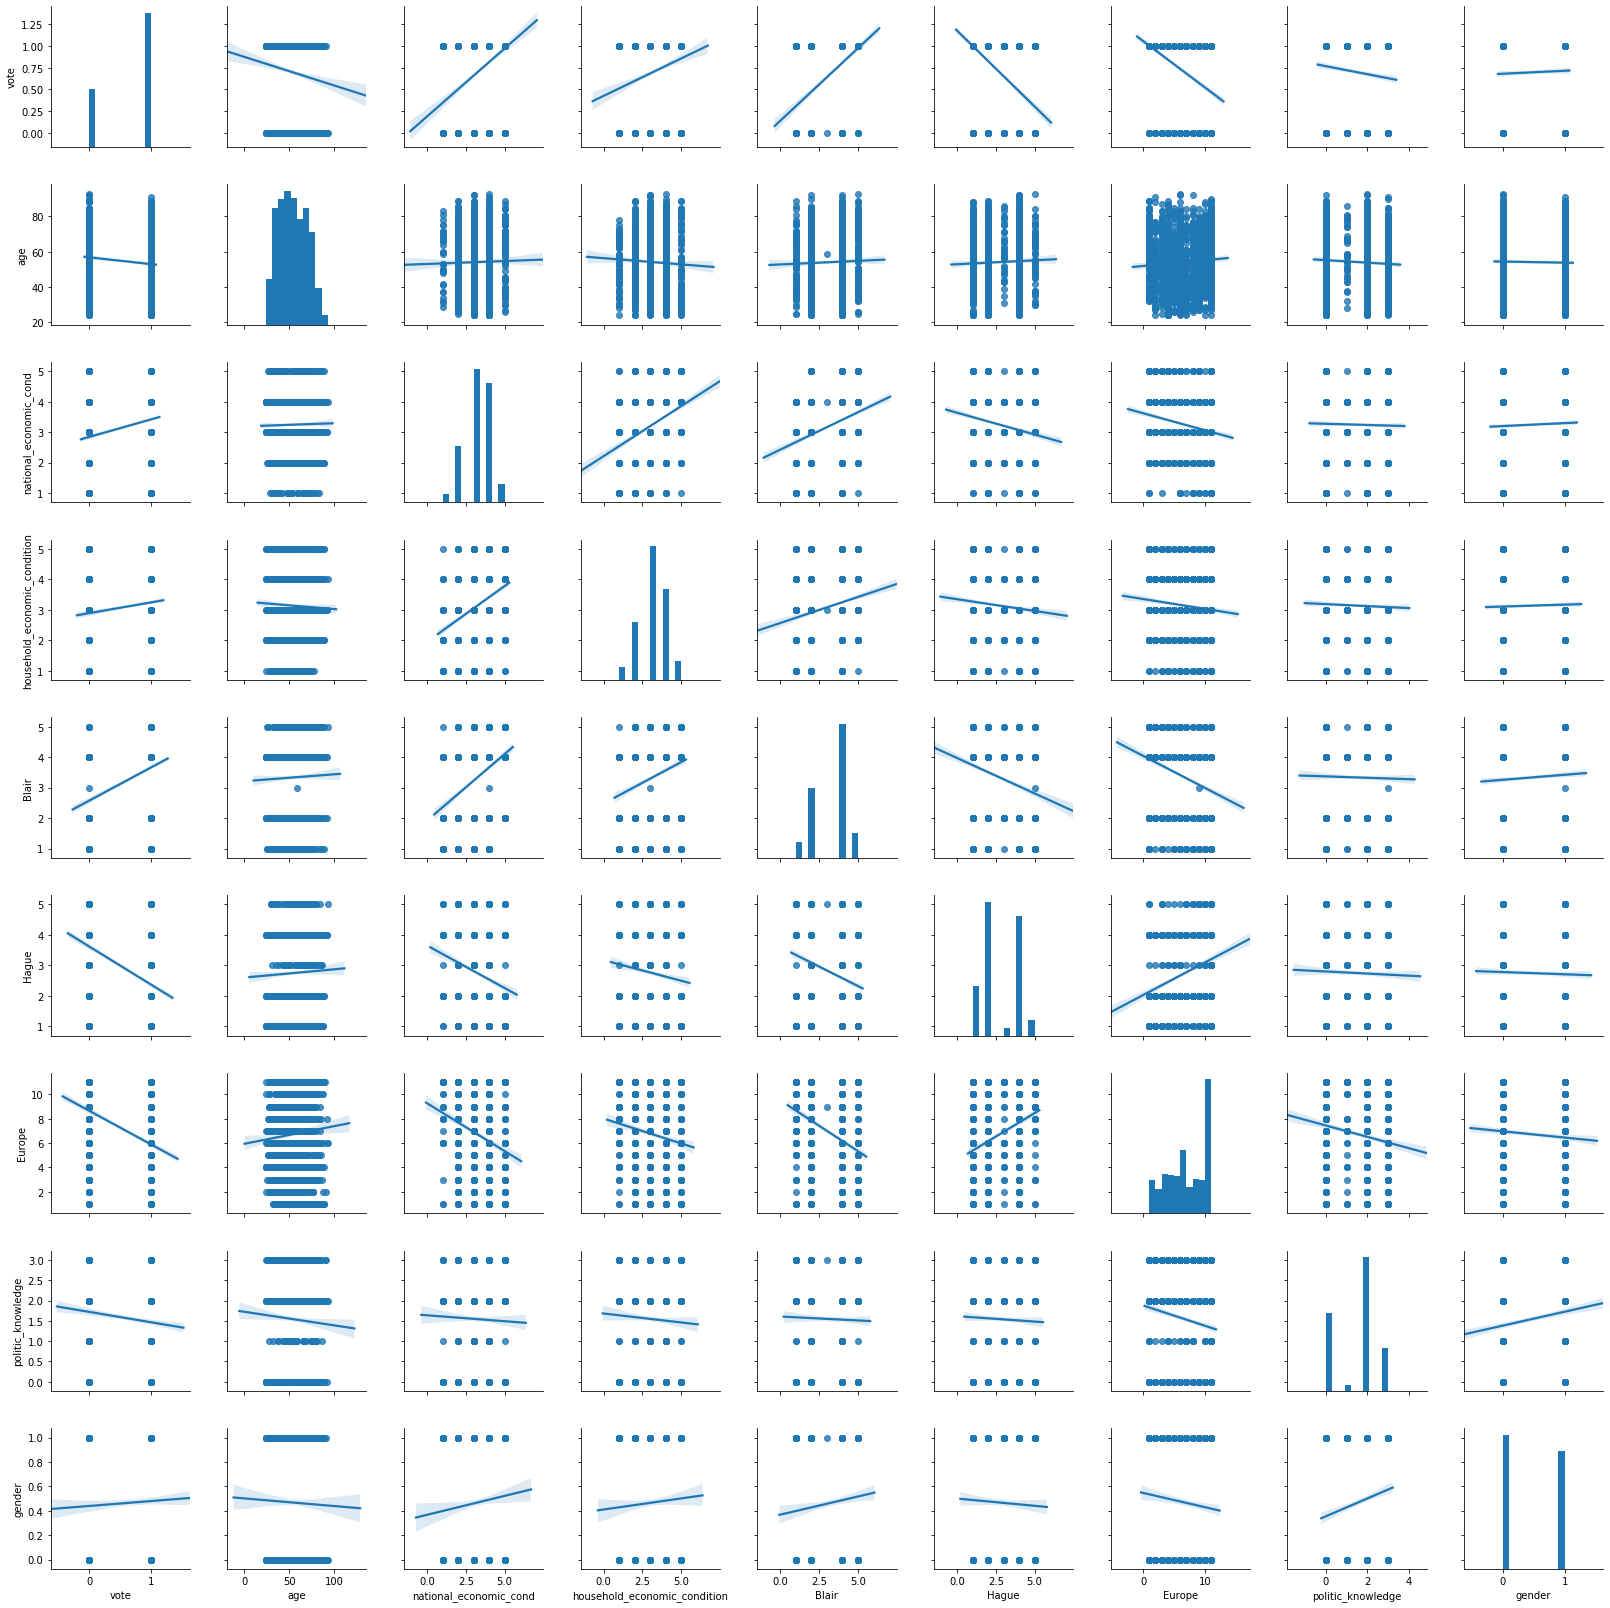

In [39]:
sns.pairplot(df, kind ='reg')
plt.savefig('reg type pairplot.png')

# 6. Scaling

In [40]:
df.head()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [41]:
#scaling is not neeeded in this case

In [42]:
# from sklearn.preprocessing import StandardScaler

In [43]:
# X = StandardScaler()
# df1 = X.fit_transform(df)

In [44]:
# df1

In [45]:
#df = pd.DataFrame(df1, index = df.index, columns = df.columns)

In [46]:
# df.head()

# 7. Train-test split

In [47]:
df.head()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [48]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [49]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# 8. Logistic Regression

In [50]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,n_jobs=2)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg')

In [52]:
# Performance Matrix on train data set for the base logit model
y_train_predict_b = model.predict(X_train)
model_train_score_b = model.score(X_train, y_train)
print(model_train_score_b)
print(metrics.confusion_matrix(y_train, y_train_predict_b))
print(metrics.classification_report(y_train, y_train_predict_b))

0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [53]:
# Performance Matrix on test data set for base logit model
y_test_predict_b = model.predict(X_test)
model_test_score_b = model.score(X_test, y_test)
print(model_test_score_b)
print(metrics.confusion_matrix(y_test, y_test_predict_b))
print(metrics.classification_report(y_test, y_test_predict_b))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [7]:
params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol' : [0.01,0.001,0.0001,0.00001],
}

logit_model =  LogisticRegression(max_iter = 50000,random_state=1)

grid_search = GridSearchCV(estimator = logit_model, param_grid = params, cv = 5)

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=50000, random_state=1),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.01, 0.001, 0.0001, 1e-05]})

In [56]:
grid_search.best_params_

{'solver': 'sag', 'tol': 1e-05}

In [57]:
logit_model = LogisticRegression(solver='sag',max_iter=50000,penalty='none',tol=0.00001,n_jobs=2)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=50000, n_jobs=2, penalty='none', solver='sag',
                   tol=1e-05)

In [58]:
## Performance Matrix on train data set for the tuned logit model
y_train_predict = logit_model.predict(X_train)
logit_train_score = logit_model.score(X_train, y_train)
print(logit_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Text(0.5, 1, 'Confusion Matrix for training data of Logistic Regression model')

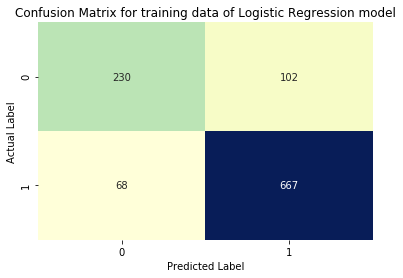

In [59]:
sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Logistic Regression model')

AUC for Logistic Regression training dataset: 0.890


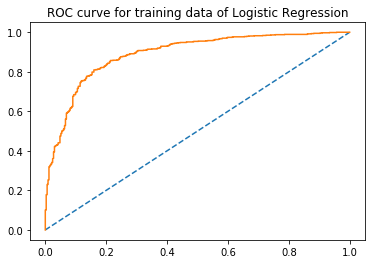

In [60]:
# predict probabilities
probs = logit_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_logit = roc_auc_score(y_train, probs)
print('AUC for Logistic Regression training dataset: %.3f' % train_auc_logit)
# calculate roc curve
train_fpr_logit, train_tpr_logit, train_thresholds_logit = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of Logistic Regression')
plt.plot(train_fpr_logit, train_tpr_logit)

In [61]:
## Performance Matrix on test data set of tuned logit model
y_test_predict = logit_model.predict(X_test)
logit_test_score = logit_model.score(X_test, y_test)
print(logit_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



Text(0.5, 1, 'Confusion Matrix for testing data of Logistic Regression model')

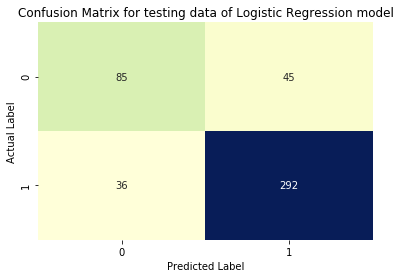

In [62]:
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of Logistic Regression model')

AUC for Logistic Regression testing dataset: 0.883


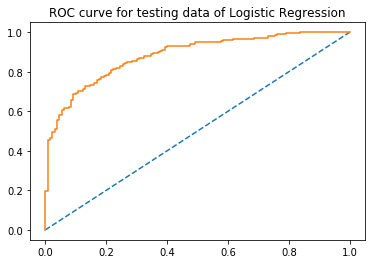

In [63]:
# predict probabilities
probs2 = logit_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
test_auc_logit = roc_auc_score(y_test, probs2)
print('AUC for Logistic Regression testing dataset: %.3f' % test_auc_logit)
# calculate roc curve
test_fpr_logit, test_tpr_logit, test_thresholds_logit = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of Logistic Regression')
plt.plot(test_fpr_logit, test_tpr_logit)

# 9.LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model1 = LinearDiscriminantAnalysis()
model1.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [65]:
# Performance Matrix on train data set for the base LDA model
y_train_predict_b1 = model1.predict(X_train)
model_train_score_b1 = model1.score(X_train, y_train)
print(model_train_score_b1)
print(metrics.confusion_matrix(y_train, y_train_predict_b1))
print(metrics.classification_report(y_train, y_train_predict_b1))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [66]:
## Performance Matrix on test data set for base LDA model
y_test_predict_b1 = model1.predict(X_test)
model_test_score_b1 = model1.score(X_test, y_test)
print(model_test_score_b1)
print(metrics.confusion_matrix(y_test, y_test_predict_b1))
print(metrics.classification_report(y_test, y_test_predict_b1))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [67]:
param_grid = {
    'solver' : ['svd', 'lsqr', 'eigen'],
    'tol' : [0.001,0.0001,0.00001]
}
lda_model =  LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 5)

In [68]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [69]:
grid_search.best_params_

{'solver': 'svd', 'tol': 0.001}

In [70]:
LDA_model = LinearDiscriminantAnalysis(solver='svd',tol=0.001)
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(tol=0.001)

In [71]:
## Performance Matrix on train data set of tuned LDA model
y_train_predict1 = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict1))
print(metrics.classification_report(y_train, y_train_predict1))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



Text(0.5, 1, 'Confusion Matrix for training data of LDA model')

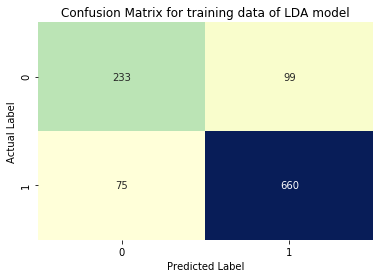

In [72]:
sns.heatmap(confusion_matrix(y_train, y_train_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of LDA model')

AUC for LDA training datset: 0.889


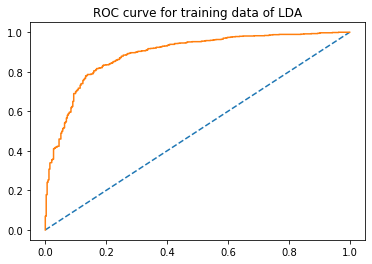

In [73]:
# predict probabilities
probs3 = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
train_auc_lda = roc_auc_score(y_train, probs3)
print('AUC for LDA training datset: %.3f' % train_auc_lda)
# calculate roc curve
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of LDA')
plt.plot(train_fpr_lda, train_tpr_lda)

In [74]:
## Performance Matrix on test data set of tuned LDA model
y_test_predict1 = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict1))
print(metrics.classification_report(y_test, y_test_predict1))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Text(0.5, 1, 'Confusion Matrix for testing data of LDA model')

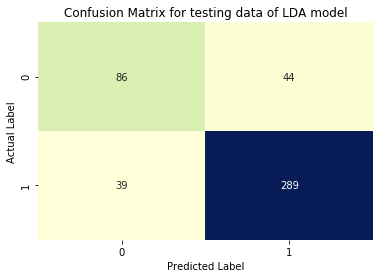

In [75]:
sns.heatmap(confusion_matrix(y_test, y_test_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of LDA model')

AUC for LDA testing dataset: 0.884


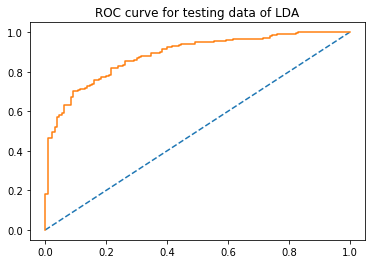

In [76]:
# predict probabilities
probs4 = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs4 = probs4[:, 1]
# calculate AUC
test_auc_lda = roc_auc_score(y_test, probs4)
print('AUC for LDA testing dataset: %.3f' % test_auc_lda)
# calculate roc curve
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of LDA')
plt.plot(test_fpr_lda, test_tpr_lda)

# 10. KNN MODEL

In [77]:
from sklearn.neighbors import KNeighborsClassifier

model2=KNeighborsClassifier()
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
# Performance Matrix on train data set for the base KNN model
y_train_predict_b2 = model2.predict(X_train)
model_train_score_b2 = model2.score(X_train, y_train)
print(model_train_score_b2)
print(metrics.confusion_matrix(y_train, y_train_predict_b2))
print(metrics.classification_report(y_train, y_train_predict_b2))

0.8537956888472352
[[242  90]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



In [79]:
## Performance Matrix on test data set for base KNN model
y_test_predict_b2 = model2.predict(X_test)
model_test_score_b2 = model2.score(X_test, y_test)
print(model_test_score_b2)
print(metrics.confusion_matrix(y_test, y_test_predict_b2))
print(metrics.classification_report(y_test, y_test_predict_b2))

0.7860262008733624
[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [80]:
param_grid = {
    'n_neighbors' : [2,3,7,9,11],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [15,20,25,30,35],
    
}
knn_model =  KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv = 5)

In [81]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 25, 30, 35],
                         'n_neighbors': [2, 3, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [82]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'n_neighbors': 7,
 'weights': 'uniform'}

In [83]:
KNN_model=KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree', leaf_size=15,weights='uniform')
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=7)

In [84]:
## Performance Matrix on train data set of tuned KNN model
y_train_predict2 = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict2))
print(metrics.classification_report(y_train, y_train_predict2))

0.8481724461105904
[[235  97]
 [ 65 670]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



Text(0.5, 1, 'Confusion Matrix for training data of KNN model')

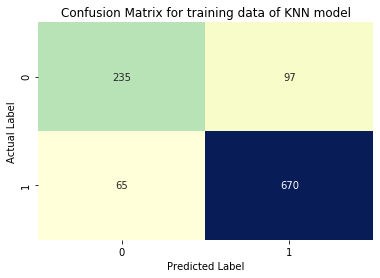

In [85]:
sns.heatmap(confusion_matrix(y_train, y_train_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of KNN model')

AUC for KNN trainnig dataset: 0.918


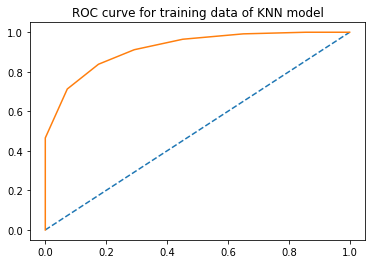

In [86]:
# predict probabilities
probs5 = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs5 = probs5[:, 1]
# calculate AUC
train_auc_KNN = roc_auc_score(y_train, probs5)
print('AUC for KNN trainnig dataset: %.3f' % train_auc_KNN)
# calculate roc curve
train_fpr_KNN, train_tpr_KNN, train_thresholds_KNN = roc_curve(y_train, probs5)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of KNN model')
plt.plot(train_fpr_KNN, train_tpr_KNN)

In [87]:
## Performance Matrix on test data set of tuned KNN model
y_test_predict2 = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict2))
print(metrics.classification_report(y_test, y_test_predict2))

0.7860262008733624
[[ 76  54]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       130
           1       0.84      0.87      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.73      0.73       458
weighted avg       0.78      0.79      0.78       458



Text(0.5, 1, 'Confusion Matrix for testing data of KNN model')

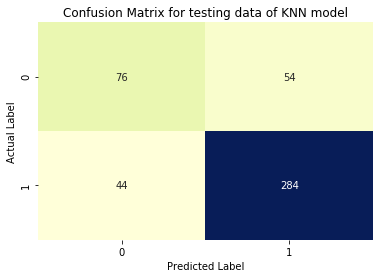

In [88]:
sns.heatmap(confusion_matrix(y_test, y_test_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of KNN model')

AUC for KNN testing dataset: 0.849


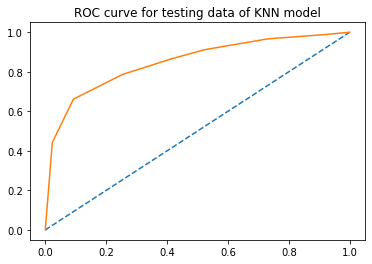

In [89]:
# predict probabilities
probs6 = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs6 = probs6[:, 1]
# calculate AUC
test_auc_KNN = roc_auc_score(y_test, probs6)
print('AUC for KNN testing dataset: %.3f' % test_auc_KNN)
# calculate roc curve
test_fpr_KNN, test_tpr_KNN, test_thresholds_KNN = roc_curve(y_test, probs6)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of KNN model')
plt.plot(test_fpr_KNN, test_tpr_KNN)

# 11. Naïve Bayes Model

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [92]:
## Performance Matrix on train data set for GaussianNB model
y_train_predict3 = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict3))
print(metrics.classification_report(y_train, y_train_predict3))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



Text(0.5, 1, 'Confusion Matrix for training data of NaiveBayes model')

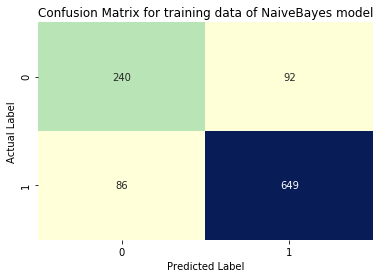

In [93]:
sns.heatmap(confusion_matrix(y_train, y_train_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of NaiveBayes model')

AUC for NaivaBayes training dataset: 0.886


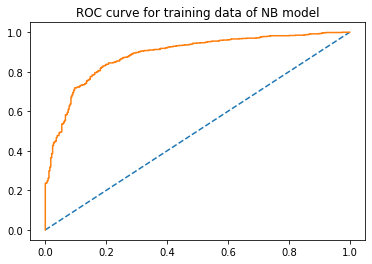

In [94]:
# predict probabilities
probs7 = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs7 = probs7[:, 1]
# calculate AUC
train_auc_NB = roc_auc_score(y_train, probs7)
print('AUC for NaivaBayes training dataset: %.3f' % train_auc_NB)
# calculate roc curve
train_fpr_NB, train_tpr_NB, train_thresholds_NB = roc_curve(y_train, probs7)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of NB model')
plt.plot(train_fpr_NB, train_tpr_NB)

In [95]:
## Performance Matrix on test data set of GaussianNB model
y_test_predict3 = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict3))
print(metrics.classification_report(y_test, y_test_predict3))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



Text(0.5, 1, 'Confusion Matrix for testing data of NaiveBayes model')

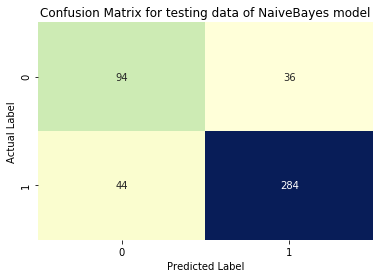

In [96]:
sns.heatmap(confusion_matrix(y_test, y_test_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of NaiveBayes model')

AUC for NaiveBayes testing dataset: 0.885


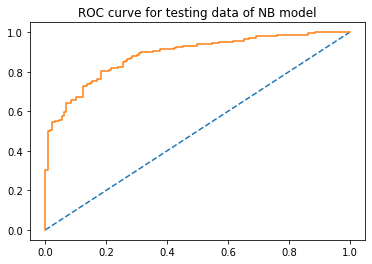

In [97]:
# predict probabilities
probs8 = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs8 = probs8[:, 1]
# calculate AUC
test_auc_NB = roc_auc_score(y_test, probs8)
print('AUC for NaiveBayes testing dataset: %.3f' % test_auc_NB)
# calculate roc curve
test_fpr_NB, test_tpr_NB, test_thresholds_NB = roc_curve(y_test, probs8)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of NB model')
plt.plot(test_fpr_NB, test_tpr_NB)

#  12. Support Vector Machine 

In [98]:
from sklearn import svm

model3= svm.SVC(probability = True, random_state=1)
model3.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [99]:
# Performance Matrix on train data set for the base SVM model
y_train_predict_b3 = model3.predict(X_train)
model_train_score_b3 = model3.score(X_train, y_train)
print(model_train_score_b3)
print(metrics.confusion_matrix(y_train, y_train_predict_b3))
print(metrics.classification_report(y_train, y_train_predict_b3))

0.7835051546391752
[[135 197]
 [ 34 701]]
              precision    recall  f1-score   support

           0       0.80      0.41      0.54       332
           1       0.78      0.95      0.86       735

    accuracy                           0.78      1067
   macro avg       0.79      0.68      0.70      1067
weighted avg       0.79      0.78      0.76      1067



In [100]:
## Performance Matrix on test data set for base SVM model
y_test_predict_b3 = model3.predict(X_test)
model_test_score_b3 = model3.score(X_test, y_test)
print(model_test_score_b2)
print(metrics.confusion_matrix(y_test, y_test_predict_b2))
print(metrics.classification_report(y_test, y_test_predict_b2))

0.7860262008733624
[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [101]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'tol' : [0.001,0.0001,0.00001],
    }
svm =svm.SVC(verbose=True, probability=True,max_iter=-1)
grid_search = GridSearchCV(estimator = svm, param_grid=param_grid, cv=5)

In [102]:
grid_search.fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(probability=True, verbose=True),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [103]:
grid_search.best_params_

{'kernel': 'linear', 'tol': 0.001}

In [104]:
from sklearn import svm
SVM_model = svm.SVC(probability=True, max_iter=-1, verbose=True, tol=0.001, kernel='linear')
SVM_model.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [105]:
# Performance Matrix on train data set of tunes SVM model
y_train_predict4 = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict4))
print(metrics.classification_report(y_train, y_train_predict4))

0.8359887535145267
[[228 104]
 [ 71 664]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       332
           1       0.86      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.84      0.83      1067



Text(0.5, 1, 'Confusion Matrix for training data of SVM model')

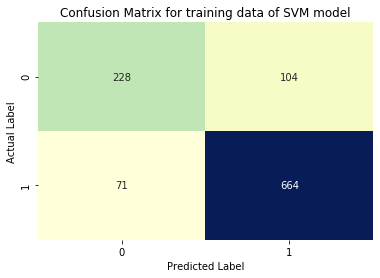

In [106]:
sns.heatmap(confusion_matrix(y_train, y_train_predict4),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of SVM model')

AUC for SVM training dataset: 0.888


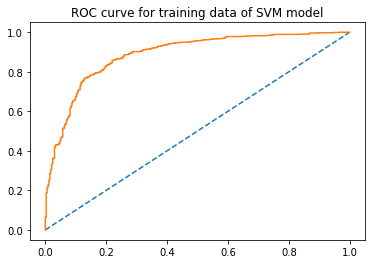

In [107]:
# predict probabilities
probs9 = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs9 = probs9[:, 1]
# calculate AUC
train_auc_SVM = roc_auc_score(y_train, probs9)
print('AUC for SVM training dataset: %.3f' % train_auc_SVM)
# calculate roc curve
train_fpr_SVM, train_tpr_SVM, train_thresholds_SVM= roc_curve(y_train, probs9)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of SVM model')
plt.plot(train_fpr_SVM, train_tpr_SVM)

In [108]:
# Performance Matrix on test data set of tuned SVM model
y_test_predict4 = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict4))
print(metrics.classification_report(y_test, y_test_predict4))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



Text(0.5, 1, 'Confusion Matrix for testing data of SVM model')

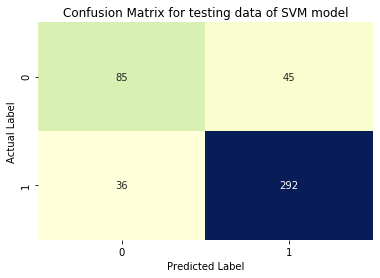

In [109]:
sns.heatmap(confusion_matrix(y_test, y_test_predict4),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of SVM model')

AUC for SVM testing dataset: 0.878119


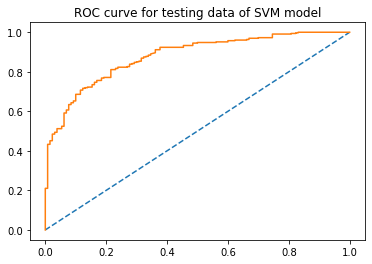

In [110]:
# predict probabilities
probs10 = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs10 = probs10[:, 1]
# calculate AUC
test_auc_SVM = roc_auc_score(y_test, probs10)
print('AUC for SVM testing dataset: %3f' % test_auc_SVM)
# calculate roc curve
test_fpr_SVM, test_tpr_SVM, test_thesholds_SVM = roc_curve(y_test, probs10)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of SVM model')
plt.plot(test_fpr_SVM, test_tpr_SVM)

# 13. Bagging

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
rf = RandomForestClassifier()
model4=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
model4.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [112]:
# Performance Matrix on train data set for the base Bagging model
y_train_predict_b4 = model4.predict(X_train)
model_train_score_b4 = model4.score(X_train, y_train)
print(model_train_score_b4)
print(metrics.confusion_matrix(y_train, y_train_predict_b4))
print(metrics.classification_report(y_train, y_train_predict_b4))

0.9653233364573571
[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [113]:
# Performance Matrix on test data set for base Bagging model
y_test_predict_b4 = model4.predict(X_test)
model_test_score_b4 = model4.score(X_test, y_test)
print(model_test_score_b4)
print(metrics.confusion_matrix(y_test, y_test_predict_b4))
print(metrics.classification_report(y_test, y_test_predict_b4))

0.8362445414847162
[[ 92  38]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



In [155]:
param_grid = {
    'n_estimators' : [300,400,500,600]
   
    }
bagging_model =  BaggingClassifier(base_estimator=rf, random_state = 1, n_jobs=-1, verbose=False)
grid_search = GridSearchCV(estimator = bagging_model, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)
# this code will take 3 hours to execute 

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [67]:
grid_search.best_params_

{'n_estimators': 700}

In [114]:
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=700,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=700,
                  random_state=1)

In [115]:
## Performance Matrix on train data set of tuned Bagging model
y_train_predict6 = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict6))
print(metrics.classification_report(y_train, y_train_predict6))

0.9690721649484536
[[306  26]
 [  7 728]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       332
           1       0.97      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.96      0.96      1067
weighted avg       0.97      0.97      0.97      1067



Text(0.5, 1, 'Confusion Matrix for training data of Bagging model')

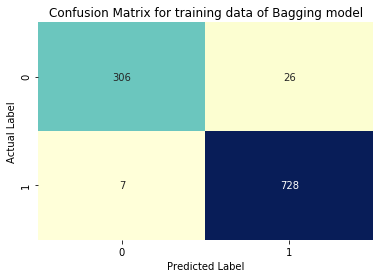

In [116]:
sns.heatmap(confusion_matrix(y_train, y_train_predict6),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Bagging model')

AUC for Bagging training dataset: 0.997


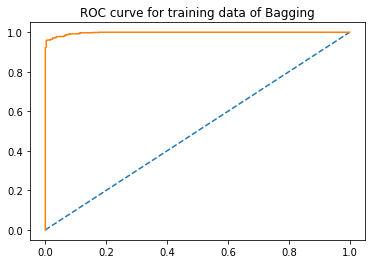

In [117]:
# predict probabilities
probs13 = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs13 = probs13[:, 1]
# calculate AUC
train_auc_Bagg = roc_auc_score(y_train, probs13)
print('AUC for Bagging training dataset: %.3f' % train_auc_Bagg)
# calculate roc curve
train_fpr_Bagg, train_tpr_Bagg, train_thresholds_Bagg = roc_curve(y_train, probs13)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of Bagging')
plt.plot(train_fpr_Bagg, train_tpr_Bagg)

In [118]:
## Performance Matrix on test data set of tuned Bagging model
y_test_predict6 = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict6))
print(metrics.classification_report(y_test, y_test_predict6))

0.8362445414847162
[[ 92  38]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



Text(0.5, 1, 'Confusion Matrix for testing data of Bagging model')

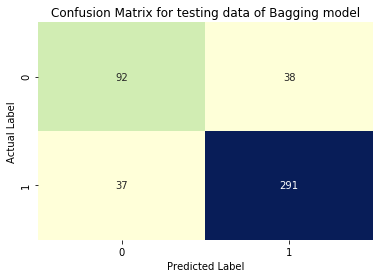

In [119]:
sns.heatmap(confusion_matrix(y_test, y_test_predict6),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of Bagging model')

AUC for Bagging testing dataset: 0.896


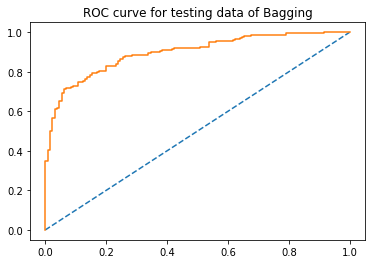

In [120]:
# predict probabilities
probs14 = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs14 = probs14[:, 1]
# calculate AUC
test_auc_Bagg = roc_auc_score(y_test, probs14)
print('AUC for Bagging testing dataset: %.3f' % test_auc_Bagg)
# calculate roc curve
test_fpr_Bagg, test_tpr_Bagg, test_thresholds_Bagg = roc_curve(y_test, probs14)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of Bagging')
plt.plot(test_fpr_Bagg, test_tpr_Bagg)

# 14. ADA boost

In [121]:
from sklearn.ensemble import AdaBoostClassifier

model5 = AdaBoostClassifier(n_estimators=100,random_state=1)
model5.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [122]:
# Performance Matrix on train data set for the base ADABoost model
y_train_predict_b5 = model5.predict(X_train)
model_train_score_b5 = model5.score(X_train, y_train)
print(model_train_score_b5)
print(metrics.confusion_matrix(y_train, y_train_predict_b5))
print(metrics.classification_report(y_train, y_train_predict_b5))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [123]:
## Performance Matrix on test data set for base ADABoost model
y_test_predict_b5 = model5.predict(X_test)
model_test_score_b5 = model5.score(X_test, y_test)
print(model_test_score_b5)
print(metrics.confusion_matrix(y_test, y_test_predict_b5))
print(metrics.classification_report(y_test, y_test_predict_b5))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [124]:
param_grid = {
    'n_estimators' : [700,1200 ,1000, 1300 ,1500],
    'algorithm' : ['SAMME', 'SAMME.R']
  
    }
ada =  AdaBoostClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 5)

In [125]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [700, 1200, 1000, 1300, 1500]})

In [126]:
grid_search.best_params_

{'algorithm': 'SAMME', 'n_estimators': 700}

In [127]:
ADB_model = AdaBoostClassifier(n_estimators=700, algorithm='SAMME', random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=700, random_state=1)

In [128]:
# Performance Matrix on train data set for tuned ADABoost model
y_train_predict7 = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict7))
print(metrics.classification_report(y_train, y_train_predict7))

0.845360824742268
[[236  96]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.82      0.81      0.82      1067
weighted avg       0.84      0.85      0.84      1067



Text(0.5, 1, 'Confusion Matrix for training data of ADABoost model')

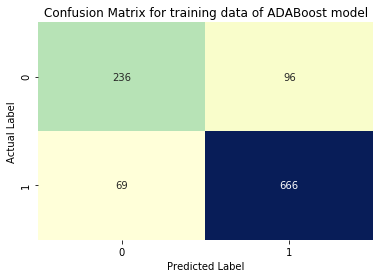

In [129]:
sns.heatmap(confusion_matrix(y_train, y_train_predict7),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of ADABoost model')

AUC for ADABoost training dataset : 0.908


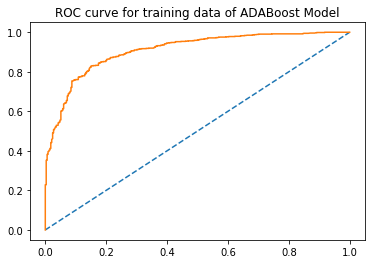

In [130]:
# predict probabilities
probs15 = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs15 = probs15[:, 1]
# calculate AUC
train_auc_ADB = roc_auc_score(y_train, probs15)
print('AUC for ADABoost training dataset : %.3f' % train_auc_ADB)
# calculate roc curve
train_fpr_ADB, train_tpr_ADB, train_thresholds_ADB = roc_curve(y_train,probs15)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of ADABoost Model')
plt.plot(train_fpr_ADB, train_tpr_ADB)

In [131]:
# Performance Matrix on test data set of tuned ADABoost Model
y_test_predict7 = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict7))
print(metrics.classification_report(y_test, y_test_predict7))

0.8144104803493449
[[ 86  44]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



Text(0.5, 1, 'Confusion Matrix for testing data of ADABoost model')

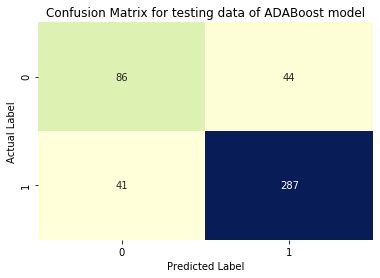

In [132]:
sns.heatmap(confusion_matrix(y_test, y_test_predict7),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of ADABoost model')

AUC for ADABoost testing dataset: 0.879


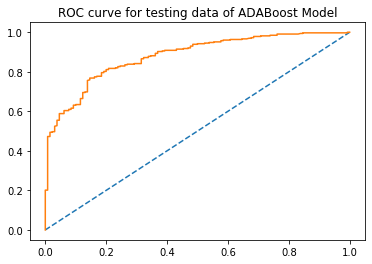

In [133]:
# predict probabilities
probs16 = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs16 = probs16[:, 1]
# calculate AUC
test_auc_ADB = roc_auc_score(y_test,probs16)
print('AUC for ADABoost testing dataset: %.3f' % test_auc_ADB)
# calculate roc curve
test_fpr_ADB, test_tpr_ADB, test_thresholds_ADB = roc_curve(y_test,probs16)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of ADABoost Model')
plt.plot(test_fpr_ADB, test_tpr_ADB)

# 15. XGBoost

In [164]:
!pip install xgboost

In [171]:
import xgboost as xgb
model6=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model6.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
# Performance Matrix on train data set for the base XGBoost model
y_train_predict_b6 = model6.predict(X_train)
model_train_score_b6 = model6.score(X_train, y_train)
print(model_train_score_b6)
print(metrics.confusion_matrix(y_train, y_train_predict_b6))
print(metrics.classification_report(y_train, y_train_predict_b6))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [173]:
## Performance Matrix on test data set for base XGBoost model
y_test_predict_b6 = model6.predict(X_test)
model_test_score_b6 = model6.score(X_test, y_test)
print(model_test_score_b6)
print(metrics.confusion_matrix(y_test, y_test_predict_b6))
print(metrics.classification_report(y_test, y_test_predict_b6))

0.8122270742358079
[[ 93  37]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       130
           1       0.88      0.85      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.81       458



In [178]:
import xgboost as xgb
param_grid = {
    'n_estimators' : [700,1200 ,1000, 1300 ,1500],
    'max_depth': [6,7,8,9],
    'learning_rate': [0.1,0.01,0.001],
    'booster' : ['gbtree','gblinear'],
    'min_child_weight' : [1,2,3],
    }
xgb =  xgb.XGBClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5)

In [196]:
grid_search.fit(X_train, y_train)

[12:12:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:12:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:12:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:12:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

[12:12:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

[12:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:13:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

[12:13:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:13:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

[12:13:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

[12:13:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:13:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:13:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:14:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur


[12:14:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

[12:14:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:14:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:14:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:15:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:15:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur


[12:15:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

[12:15:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:15:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:15:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura

[12:15:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accura


[12:15:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:15:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accur

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [197]:
grid_search.best_params_

{'booster': 'gblinear',
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 1000}

In [206]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(booster='gblinear', learning_rate=0.1, max_depth=6,n_estimators=1000, eval_metric='logloss',random_state=1)
XGB_model.fit(X_train, y_train)

[18:53:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='logloss', gamma=None, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=None,
              random_state=1, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

In [199]:
## Performance Matrix on train data set for tuned XGBoost Model
y_train_predict8 = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict8))
print(metrics.classification_report(y_train, y_train_predict8))

0.837863167760075
[[229 103]
 [ 70 665]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



Text(0.5, 1, 'Confusion Matrix for training data of XGBoost model')

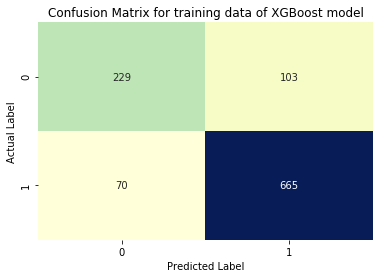

In [200]:
sns.heatmap(confusion_matrix(y_train, y_train_predict8),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of XGBoost model')

AUC for XGBoost training dataset: 0.890


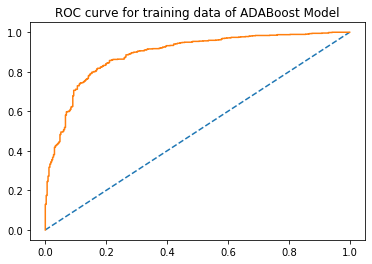

In [201]:
# predict probabilities
probs17 = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs17 = probs17[:, 1]
# calculate AUC
train_auc_XGB = roc_auc_score(y_train,probs17)
print('AUC for XGBoost training dataset: %.3f' % train_auc_XGB)
# calculate roc curve
train_fpr_XGB, train_tpr_XGB, train_thresholds_XBG = roc_curve(y_train,probs17)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of ADABoost Model')
plt.plot(train_fpr_XGB, train_tpr_XGB)

In [185]:
## Performance Matrix on test data set of tuned XGBoost Model
y_test_predict8 = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict8))
print(metrics.classification_report(y_test, y_test_predict8))

0.8187772925764192
[[ 85  45]
 [ 38 290]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Text(0.5, 1, 'Confusion Matrix for testing data of XGBoost model')

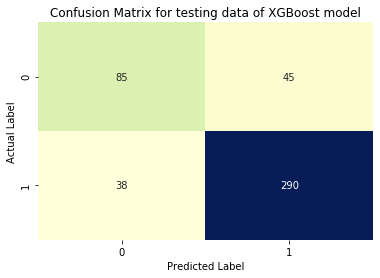

In [186]:
sns.heatmap(confusion_matrix(y_test, y_test_predict8),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of XGBoost model')

AUC for XGBoost testing dataset: 0.884


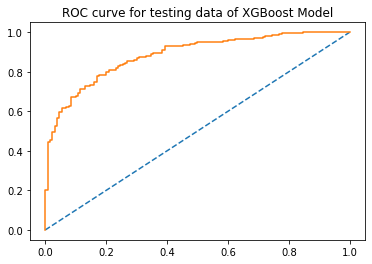

In [187]:
# predict probabilities
probs18 = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs18 = probs18[:, 1]
# calculate AUC
test_auc_XGB = roc_auc_score(y_test,probs18)
print('AUC for XGBoost testing dataset: %.3f' % test_auc_XGB)
# calculate roc curve
test_fpr_XGB, test_tpr_XGB, test_thresholds_XBG = roc_curve(y_test,probs18)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of XGBoost Model')
plt.plot(test_fpr_XGB, test_tpr_XGB)

# 16. Interpreting Results

In [209]:
XGB_model.coef_

array([-0.0180098,  0.37078  ,  0.185172 ,  0.586572 , -0.807818 ,
       -0.228137 , -0.458563 ,  0.310681 ])

# PROBLEM 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# 17. Importing Speeches

In [222]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [223]:
sp1 = inaugural.raw('1941-Roosevelt.txt')

In [224]:
sp2 = inaugural.raw('1961-Kennedy.txt')

In [225]:
sp3 = inaugural.raw('1973-Nixon.txt')

# 18. Counting words in the speeches

In [226]:
# no of words
from nltk.tokenize import word_tokenize
words_tokens1 = word_tokenize(sp1)
words_tokens1

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.',
 'In',
 'Washington',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'In',
 'Lincoln',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'histor

In [227]:
print("no of words in Roosewelt speech is: {}".format(len(words_tokens1)))

no of words in Roosewelt speech is: 1526


In [228]:
words_tokens2 = word_tokenize(sp2)
words_tokens2

['Vice',
 'President',
 'Johnson',
 ',',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'Chief',
 'Justice',
 ',',
 'President',
 'Eisenhower',
 ',',
 'Vice',
 'President',
 'Nixon',
 ',',
 'President',
 'Truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.',
 'For',
 'I',
 'have',
 'sworn',
 'I',
 'before',
 'you',
 'and',
 'Almighty',
 'God',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 '.',
 'The',
 'world',
 'is',
 'very',
 'different',
 'now',
 '.',
 'For',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 'human',
 

In [229]:
print("no of words in Kennedy speech is: {}".format(len(words_tokens2)))

no of words in Kennedy speech is: 1543


In [230]:
words_tokens3 = word_tokenize(sp3)
words_tokens3

['Mr.',
 'Vice',
 'President',
 ',',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 'what',
 'other',
 'p

In [231]:
print("no of words in Nixon speech is: {}".format(len(words_tokens3)))

no of words in Nixon speech is: 2006


# 19. Counting No Of Sentences

In [232]:
# no of sentences
from nltk.tokenize import sent_tokenize
sent_tokens1 = sent_tokenize(sp1)
sent_tokens1

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 "In Washington's day the task of the people was to create and weld together a nation.",
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.",
 'In this day the task of the people is to save that Nation and its institutions from disruption from without.',
 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.',
 'If we do not, we risk the real peril of inaction.',
 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.',
 'The life of a man is three-score years and ten: a little more, a little less.',
 'The life of a nation is the fullness of the measure of its will to live.',
 'There are men who doubt this.',
 'There are men wh

In [233]:
print("no of sentences in Roosewelt speech are:{} ".format(len(sent_tokens1)))

no of sentences in Roosewelt speech are:68 


In [234]:
sent_tokens2 = sent_tokenize(sp2)
sent_tokens2

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.',
 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 'The world is very different now.',
 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.',
 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 'We dare not forget today that we are the heirs of that first revolution.',
 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been pa

In [235]:
print("no of sentences in Kennedy speech are:{} ".format(len(sent_tokens2)))

no of sentences in Kennedy speech are:52 


In [236]:
sent_tokens3 = sent_tokenize(sp3)
sent_tokens3

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.',
 'The central question before us is: How shall we use that peace?',
 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.',
 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.',
 'This past year saw far-reaching results from our new policies for peace.',
 'By continuing to revitalize ou

In [237]:
print("no of sentences in Nixon speech are:{} ".format(len(sent_tokens3)))

no of sentences in Nixon speech are:68 


# 20. Counting No Of Characters

In [238]:
# no of characters including spaces in Roosewelt Speech
len(sp1)

7571

In [239]:
# no of characters not including spaces in Roosewelt Speech
sp_1 = sp1.replace(" ","")
len(sp_1)

6249

In [240]:
# no of characters including spaces in Nixon Speech
len(sp2)

7618

In [241]:
# no of characters not including spaces in Nixon Speech
sp_2 = sp2.replace(" ","")
len(sp_2)

6255

In [242]:
# no of characters including spaces in Kennedy Speech
len(sp3)

9991

In [243]:
# no of characters in Kennedy Speech not including the spaces
sp_3 = sp3.replace(" ","")
len(sp_3)

8223

# 21. Converting all speeches to Lower Case

In [244]:
sp1 = sp1.lower()
words_tokens_1 = word_tokenize(sp1)

In [245]:
sp2 = sp2.lower()
words_tokens_2 = word_tokenize(sp2)

In [246]:
sp3 = sp3.lower()
words_tokens_3 = word_tokenize(sp3)

# 22. Removing Stopwords 

In [247]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_test = stopwords.words('english')

In [248]:
stop_test.sort()
print(stop_test)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [249]:
# removing stopwords
tokens_without_sw1 = [word for word in words_tokens_1 if not word in stop]
tokens_without_sw1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 ',',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 '.',
 'washington',
 "'s",
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 '.',
 'lincoln',
 "'s",
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 '.',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 '.',
 'us',
 'come',
 'time',
 ',',
 'midst',
 'swift',
 'happenings',
 ',',
 'pause',
 'moment',
 'take',
 'stock',
 '--',
 'recall',
 'place',
 'history',
 ',',
 'rediscover',
 'may',
 '.',
 ',',
 'risk',
 'real',
 'peril',
 'inaction',
 '.',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 ',',
 'lifetime',
 'human',
 'spirit',
 '.',
 'life',
 'man',
 'three-score',
 'years',
 'ten',
 ':',
 'little',
 ',',
 'little',
 'less',
 '.',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 '.',
 'men',
 'doubt',
 '.',
 'men',
 'believe',
 'democracy',

In [250]:
tokens_without_sw2 = [word for word in words_tokens_2 if not word in stop]
tokens_without_sw2

['vice',
 'president',
 'johnson',
 ',',
 'mr.',
 'speaker',
 ',',
 'mr.',
 'chief',
 'justice',
 ',',
 'president',
 'eisenhower',
 ',',
 'vice',
 'president',
 'nixon',
 ',',
 'president',
 'truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'observe',
 'today',
 'victory',
 'party',
 ',',
 'celebration',
 'freedom',
 '--',
 'symbolizing',
 'end',
 ',',
 'well',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'well',
 'change',
 '.',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 '.',
 'world',
 'different',
 '.',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 '.',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 '--',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 ',',
 'hand',
 'god',
 '.',
 'dare',
 'forget',


In [251]:
tokens_without_sw3 = [word for word in words_tokens_3 if not word in stop]
tokens_without_sw3

['mr.',
 'vice',
 'president',
 ',',
 'mr.',
 'speaker',
 ',',
 'mr.',
 'chief',
 'justice',
 ',',
 'senator',
 'cook',
 ',',
 'mrs.',
 'eisenhower',
 ',',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 ':',
 'met',
 'four',
 'years',
 'ago',
 ',',
 'america',
 'bleak',
 'spirit',
 ',',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 '.',
 'meet',
 'today',
 ',',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 '.',
 'central',
 'question',
 'us',
 ':',
 'shall',
 'use',
 'peace',
 '?',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 ':',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 '.',
 'let',
 'us',
 'resolve',
 'become',
 ':',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 ',',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',

# 23. Removing Punctuations

In [252]:
import string
punc = string.punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [253]:
punc = punc + '--'
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~--


In [254]:
tokens_without_punc1 = [word for word in tokens_without_sw1 if not word in punc]
tokens_without_punc1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 "'s",
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 "'s",
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three-score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',


In [255]:
tokens_without_punc2 = [word for word in tokens_without_sw2 if not word in punc]
tokens_without_punc2

['vice',
 'president',
 'johnson',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alik

In [256]:
tokens_without_punc3 = [word for word in tokens_without_sw3 if not word in punc]
tokens_without_punc3

['mr.',
 'vice',
 'president',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs.',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far-reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


# 24. Looking at the top words in the speeches

In [257]:
from nltk.probability import FreqDist
fdist_sp1 = FreqDist(tokens_without_punc1)
fdist_sp1

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [258]:
# top 3 words in Roosewelt Speech
fdist_sp1.most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

In [259]:
fdist_sp2 = FreqDist(tokens_without_punc2)
fdist_sp2

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [260]:
# top 3 words in Nixon Speech
fdist_sp2.most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

In [261]:
fdist_sp3 = FreqDist(tokens_without_punc3)
fdist_sp3

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, "'s": 14, 'nation': 11, 'responsibility': 11, 'government': 10, ...})

In [262]:
# top 3 words in Kennedy Speech
fdist_sp3.most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

# 25. Plotting Word Cloud for the 3 Speeches

In [263]:
!pip install wordcloud

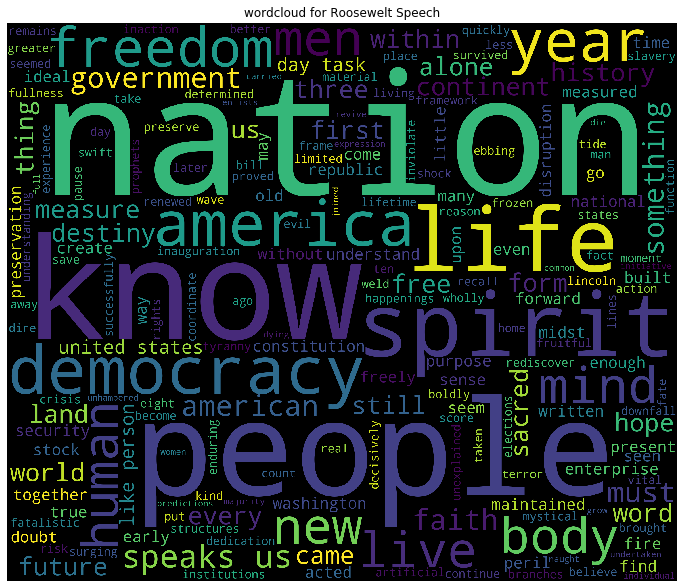

In [267]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(tokens_without_punc1)
cleaned_word1 = " ".join([word for word in words.split()
                            ])
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word1)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')

plt.title('wordcloud for Roosewelt Speech')
plt.savefig('Roosewelt Speech.png')
plt.show()

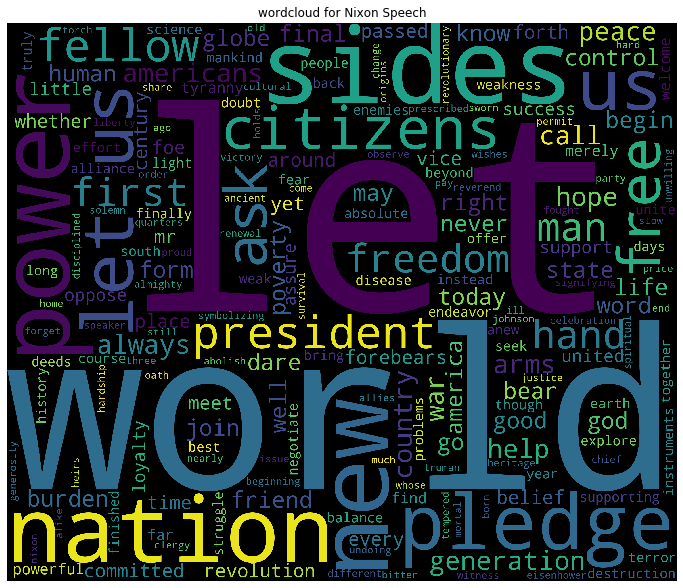

In [265]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(tokens_without_punc2)
cleaned_word2 = " ".join([word for word in words.split()
                            ])
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word2)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('wordcloud for Nixon Speech')
plt.savefig('Nixon Speech.png')
plt.show()

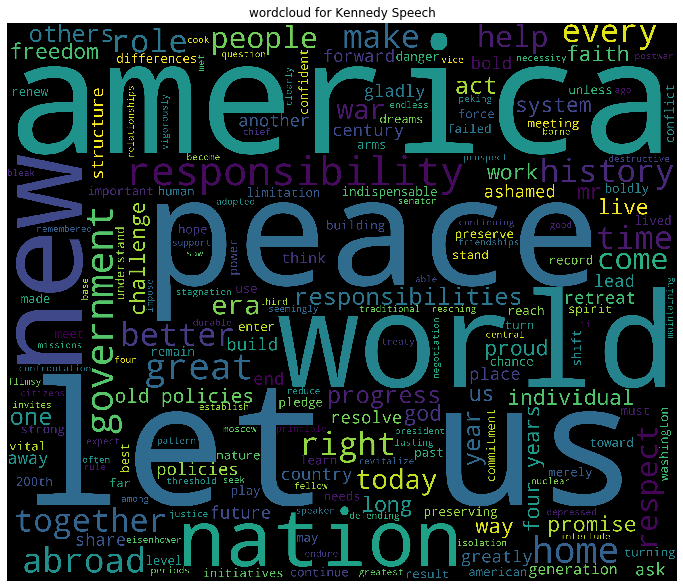

In [266]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(tokens_without_punc3)
cleaned_word3 = " ".join([word for word in words.split()
                            ])
wordcloud3 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word3)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title('wordcloud for Kennedy Speech')
plt.savefig('Kennedy Speech.png')
plt.show()